In [92]:
import numpy as np
rng = np.random.default_rng()
n_iter = 10000
max_samples = 10
mu = 0.5

In [93]:
def empirical_mean_estimator(data):
    return np.mean(data)

In [94]:
def laplace_mean_estimator(data):
    return (1 + np.sum(data))/(2 + len(data))

In [101]:
def do_experiment(estimator, mu, n_samples, n_iter):
    
    bias = 0
    meansq = 0
    mean = 0
    for t in range(n_iter):
        estimate = estimator(rng.choice([0,1],p=[1-mu,mu], size=n_samples))
        bias += estimate - mu
        meansq += estimate*estimate
        mean += estimate
    bias /= n_iter
    mean /= n_iter
    meansq /= n_iter
    variance = mean*mean - meansq
    return bias, variance

In [102]:
bias = np.zeros(max_samples)
variance = np.zeros(max_samples)
mu = 0.5
for n_samples in range(max_samples):
    bias[n_samples], variance[n_samples] = do_experiment(empirical_mean_estimator, mu, 1 + n_samples, n_iter)
    

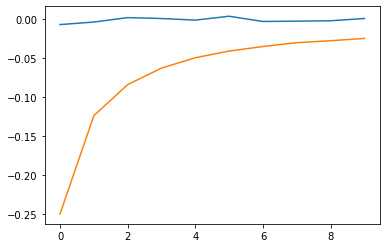

In [103]:
import matplotlib.pyplot as plt
plt.plot(bias)
plt.plot(variance)
plt.legend(["Bias", "Variance"])

In [104]:
lbias = np.zeros(max_samples)
lvariance = np.zeros(max_samples)
for n_samples in range(max_samples):
    lbias[n_samples], lvariance[n_samples] = do_experiment(laplace_mean_estimator, mu, 1 + n_samples, n_iter)
    

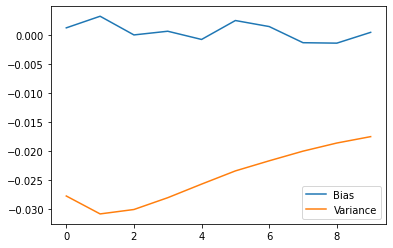

In [107]:
import matplotlib.pyplot as plt
plt.plot(lbias)
plt.plot(lvariance)
plt.legend(["Bias", "Variance"])

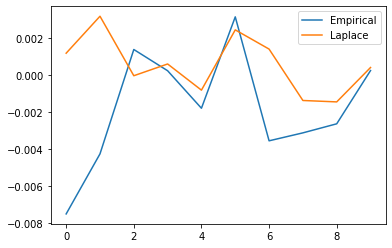

In [105]:
import matplotlib.pyplot as plt
plt.plot(bias)
plt.plot(lbias)
plt.legend(["Empirical", "Laplace"])

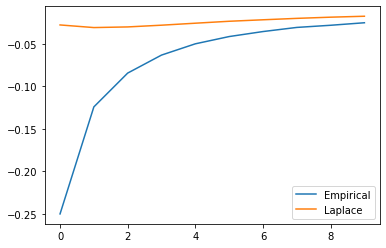

In [106]:
plt.plot(variance)
plt.plot(lvariance)
plt.legend(["Empirical", "Laplace"])